In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_HIGHNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsLowNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

              bw        mse
0       0.000282  22.415447
1       0.000372  22.407177
2       0.000491  22.392714
3       0.000649  22.364241
4       0.000857  22.298664
5       0.001131  22.171982
6       0.001493  21.968044
7       0.001972  21.688585
8       0.002603  21.270937
9       0.003437  20.626617
10      0.004538  19.646915
11      0.005992  18.212597
12      0.007912  16.252562
13      0.010446  13.790081
14      0.013793  10.942122
15      0.018211   7.940803
16      0.024046   5.139380
17      0.031749   2.962434
18      0.041919   1.599894
19      0.055348   0.869843
20      0.073079   0.496190
21      0.096490   0.320325
22      0.127401   0.288885
23      0.168214   0.394170
24      0.222102   0.632664
25      0.293252   0.997110
26      0.387196   1.466123
27      0.511235   1.980075
28      0.675010   2.432786
29      0.891251   2.761102
30      1.135011   2.968308
31      1.445440   3.127898
32      1.840772   3.248686
33      2.344229   3.335899
34      2.985383   3

Text(0.5, 1.0, 'Minimum MSE is (0.28888506, 22)')

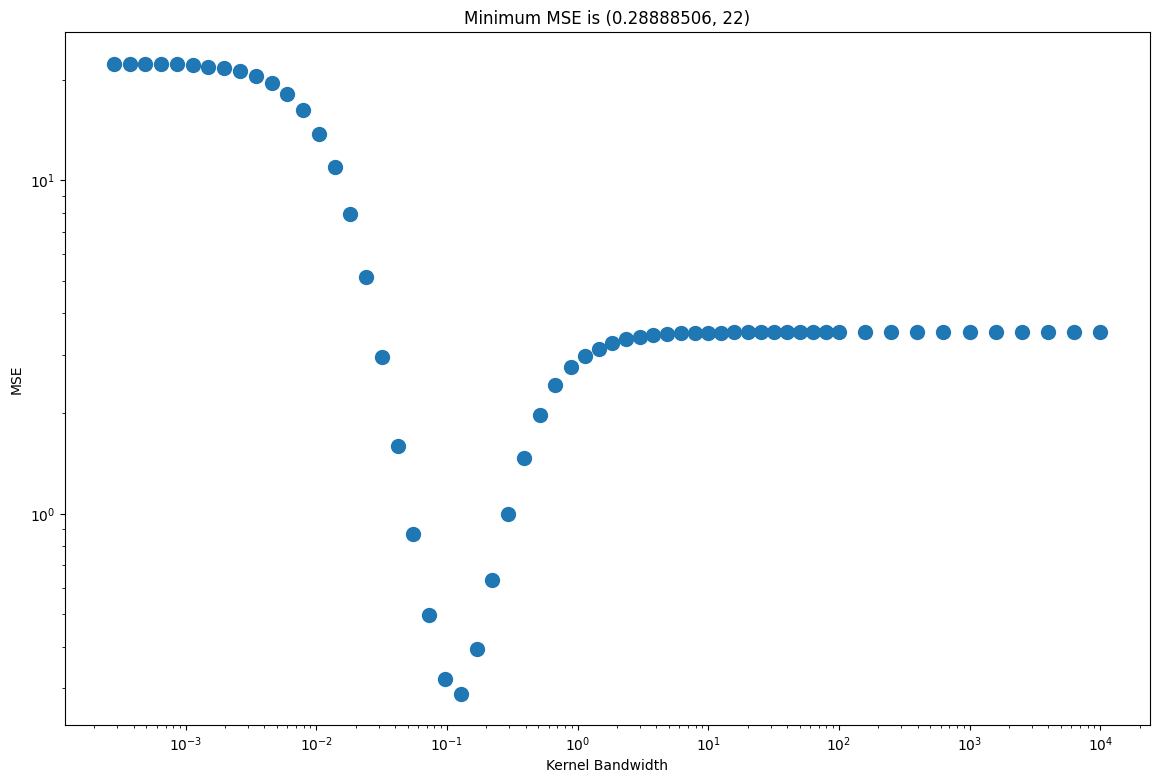

In [5]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")